In [75]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset
import datetime


In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01b_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01b_noSVB_febTS/'
#iters = [xx for xx in range(10,1440*5+10,10)]
levels = [1]
ds = open_mdsdataset(outdir, prefix=['phiBot'], levels=levels)#, iters=iters)
ds2 = open_mdsdataset(outdir2, prefix=['phiBot'], levels=levels)#, iters=iters)

In [58]:
time = np.arange(0,720)*600
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)

# depth - bathymetry with SVB
depthSVB = ds.Depth[:]

time = ds.time

In [90]:
def frame(tt,hrs, ax):
    ssh = np.ma.masked_array(ds.PHIBOT[tt,:,:]-ds2.PHIBOT[tt,:,:], mask=mask[0,:,:])   
    pc = ax.pcolormesh(LON,LAT,ssh*1E3,cmap='PuOr',vmin=-2.5, vmax=2.5)
    ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors=['k'])
    ax.contour(lon,lat,depthSVB[:,:], levels=[500], colors=['0.5'],alpha=0.7)
    
    ax.set_title('%1.1f hrs' %hrs, pad=0)
    ax.set_xlim(-118, -115)
    ax.set_ylim(29.5,33.5)
    ax.set_aspect(1)
    
    return(pc)

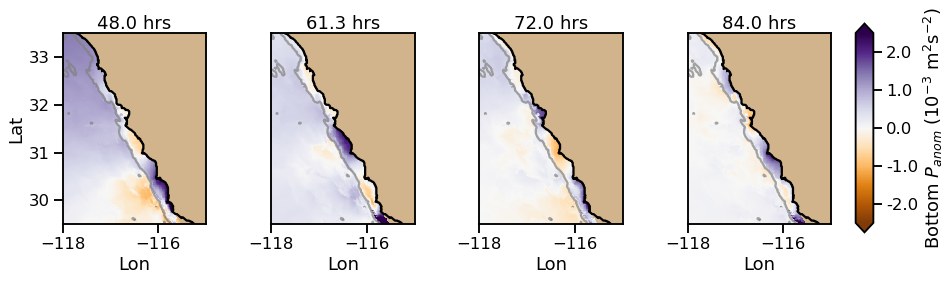

In [94]:
## === FIGURE ===
sns.set_context('talk')

fig, (ax1,ax2,ax3, ax4) = plt.subplots(1,4, figsize=(12.3,5))
axs = [ax1,ax2,ax3,ax4]

# Plot each frame
for tt, hrs, axx in zip([288,368,432,504], [288/6,368/6,432/6,504/6], axs):
    axx.set_facecolor('tan')
    pc=frame(tt, hrs, axx)

# Set ticks and labels    
ax1.set_ylabel('Lat')
for axx in (ax1,ax2,ax3, ax4):
    axx.set_xlabel('Lon')
for axx in (ax2,ax3,ax4):
    axx.set_yticks([])

# colorbars    
cbar_ax = fig.add_axes([0.98, 0.23, 0.02, 0.58]) 
fig.colorbar(pc,cax=cbar_ax, orientation='vertical', 
             format='%1.1f', label='Bottom $P_{anom}$ (10$^{-3}$ m${^2}$s$^{-2}$)', pad=0, extend='both')
plt.tight_layout()
# save figure
plt.savefig('figure_botP.png', dpi=500, bbox_inches='tight')

In [6]:
ssh = np.ma.masked_array(ds.PHIBOT[288,:,:]-ds2.PHIBOT[288,:,:], mask=mask[0,:,:])

In [7]:
np.min(ssh)

-0.010163503269241515

In [89]:
#288,369,432,504,576,648,720,792,864
ds.time[718]

<xarray.DataArray 'time' ()>
array(7190000000000, dtype='timedelta64[ns]')
Coordinates:
    iter     int64 dask.array<chunksize=(), meta=np.ndarray>
    time     timedelta64[ns] 01:59:50

In [81]:
print(time.data[288])

2890000000000 nanoseconds


In [80]:
(2890000000000/1E9)

0.8027777777777778